In [32]:
import json
import matplotlib.pyplot as plt
ss = [0.0, 0.1, 0.5, 0.9, 0.95, 0.99]

def read_results(method, model_name, s):
    with open(f'results/{method}/{model_name}-{s}/eval_results.json') as f:
        data = json.load(f)
        return data

def get_acc(method, model_name):
    scores = []
    for s in ss:
        scores.append(read_results(method, model_name, s)["eval_accuracy"])
    return scores

def get_bleu(method, model_name):
    scores = []
    for s in ss:
        scores.append(read_results(method, model_name, s)["eval_bleu"])
    return scores

def get_rt(method, model_name):
    rt = []
    for s in ss:
        rt.append(read_results(method, model_name, s)['eval_runtime'])
    return rt


def plot_perf(x, y1, y2, y1_label, y2_label, title, fname):
    plt.plot(x, y1, "-b", label=y1_label)
    plt.plot(x, y2, "-r", label=y2_label)
    plt.legend(loc='lower left')
    plt.xlabel('% pruned')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.savefig(fname)
    plt.close()

def plot_rt(x, y, title, fname):
    plt.plot(x, y)
    plt.title(title)
    plt.savefig(fname)
    plt.close()

In [33]:
# GPT2
GPT2_CLM = get_acc('clm', 'gpt2')
GPT2_GLUE = get_acc('GLUE', 'gpt2')
plot_perf(ss, GPT2_CLM, GPT2_GLUE, "CLM", "GLUE-MNLI", "Performance of GPT2 on CLM and GLUE", "gpt2-perf")


In [40]:
# DeBerTa
DEB_GLUE = get_acc('GLUE', 'microsoft/deberta-v2-xlarge')
DEB_MLM = get_acc('mlm', 'microsoft/deberta-v2-xlarge')
plot_perf(ss, DEB_MLM, DEB_GLUE, "MLM", "GLUE-MNLI", "Performance of Deberta on MLM and GLUE-MNLI", "deberta-perf")


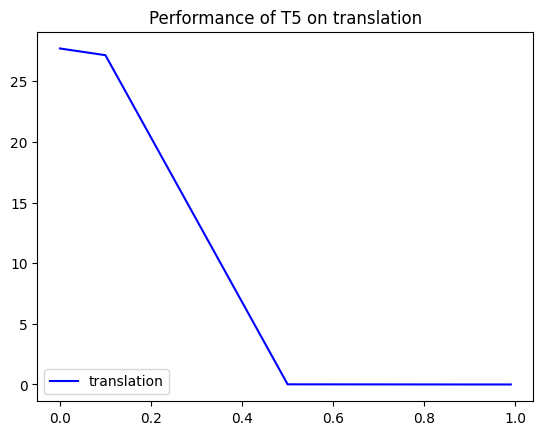

In [35]:
# T5
T5_TRAN = get_bleu('translation', 't5-base')
plt.plot(ss, T5_TRAN, "-b", label='translation')
plt.legend(loc='lower left')
plt.title("Performance of T5 on translation")
plt.savefig('t5-perf')

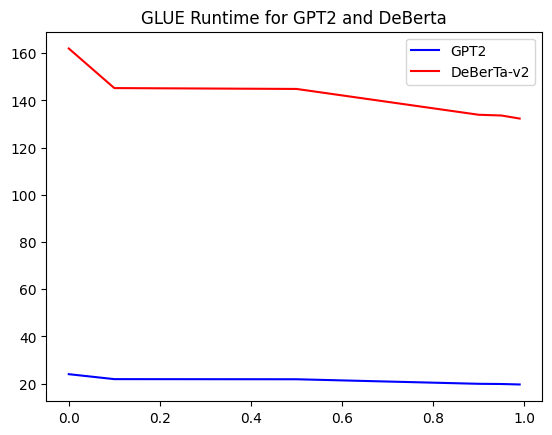

In [36]:
#GPT2 runtime
GPT2_RT = get_rt('GLUE', 'gpt2')
DEB_RT = get_rt('GLUE','microsoft/deberta-v2-xlarge')
plt.plot(ss, GPT2_RT, "-b", label="GPT2")
plt.plot(ss, DEB_RT, "-r", label="DeBerTa-v2")
plt.legend(loc='upper right')
plt.title("GLUE Runtime for GPT2 and DeBerta")
plt.savefig('GLUE-runtime')

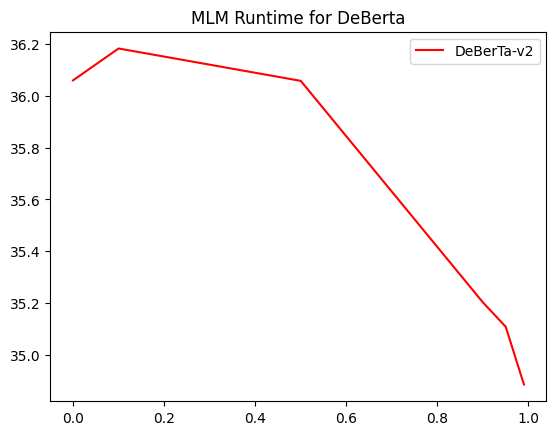

In [37]:
# mlm
mlm_rt = get_rt('mlm', 'microsoft/deberta-v2-xlarge')
plt.plot(ss, mlm_rt, "-r", label="DeBerTa-v2")
plt.legend(loc='upper right')
plt.title("MLM Runtime for DeBerta")
plt.savefig('MLM-Deberta-runtime')

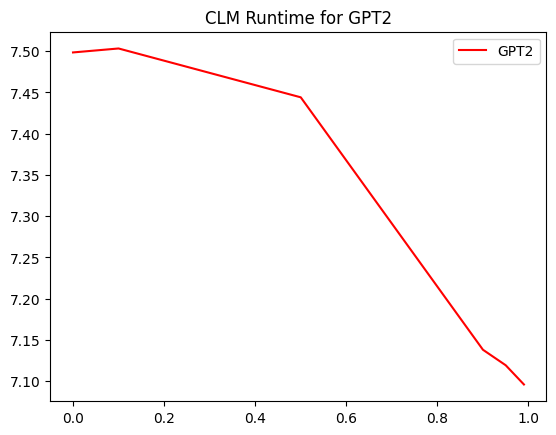

In [38]:
# clm
clm_rt = get_rt('clm', 'gpt2')
plt.plot(ss, clm_rt, "-r", label="GPT2")
plt.legend(loc='upper right')
plt.title("CLM Runtime for GPT2")
plt.savefig('CLM-GPT2-runtime')

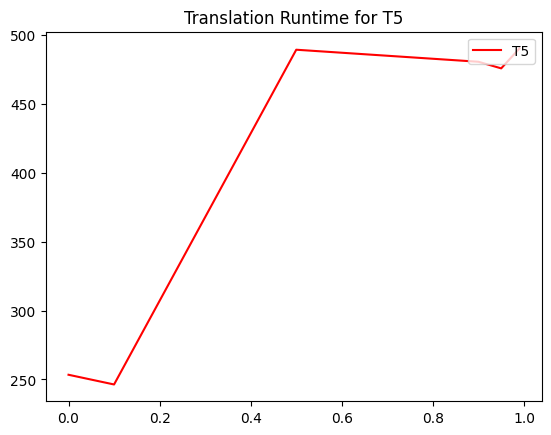

In [39]:
# translation
t_rt = get_rt('translation', 't5-base')
plt.plot(ss, t_rt, "-r", label="T5")
plt.legend(loc='upper right')
plt.title("Translation Runtime for T5")
plt.savefig('Translation-T5-runtime')